
# 🌍 NERC Digital Gathering - Environmental Data Hackathon — ECMWF Notebook

Welcome to the NERC Digital Gathering hackathon!  
This notebook contains the challenge briefs and starter code for you to explore weather, climate, and soil data available through CEDA and other sources. In the hackathon we invite you to use NERC data and to explore the CEDA archive. However, Cranfield hold the national soil map and so if your hack involves soil you can also use that dataset too.

In the hackathon, we are offering a chance to explore and interact with a range of meteorological ands other data in CEDA - NERC's Centre for Environmental Data Analysis. The datasets we are looking at include ECMWF, HAD and MIDAS. These data are in different formats and structures so you can explore these differences as well.

**MIDAS** (Met Office Integrated Data Archive System): This is a database of raw weather observations from land and marine surface stations, both in the UK and globally. It contains daily, hourly and sub-hourly measurements of various parameters like temperature, rainfall, sunshine, wind, cloud cover, and present weather codes. MIDAS data is station based timeseries data in CSV format.

**ECMWF** (European Centre for Medium-Range Weather Forecasts): This organisation produces weather forecasts and climate reanalyses. ECMWF data includes estimates of atmospheric parameters like air temperature, pressure, and wind at different altitudes, as well as surface parameters like rainfall, soil moisture content, ocean-wave height, and sea-surface temperature, for the entire globe. They also have ocean reanalysis and analysis systems like OCEAN5. ECMWF has regional gridded data in NetCDF format.

**HadUK-Grid** is a dataset of gridded climate variables for the UK derived from interpolated land surface observations. It focuses on climate variables like temperature, rainfall, sunshine, mean sea level pressure, wind speed, relative humidity, vapour pressure, days of snow lying, and days of ground frost, at daily, monthly, seasonal, and annual timescales. HADUK has regional gridded data in NetCDF format.

**This notebook sets some challenges using the ECMWF (European Centre for Medium-Range Weather Forecasts) data in CEDA.**

---

## ⚙️ Getting Started

1. **Load libraries**  
   The sorts of libraries you may need include `xarray`, `pandas`, `matplotlib`, and `scikit-learn`.  
   (Install with `pip install ...` if missing.)

2. **Accessing CEDA data with NetCDF**  
   Example:
   ```python
   import xarray as xr
   file_pattern = "/badc/ecmwf-era51/data/oper/an_sfc/2006/01/01/ecmwf-era51_oper_an_sfc_20060101*.2t.nc"
   ds = xr.open_mfdataset(file_pattern, chunks={'time': 24})  # Replace with your chosen dataset
   print(ds)
   ```

3. **Notebook structure**  
   Each challenge is introduced in Markdown with background, tasks, and judging criteria.  
   Under each challenge you'll find starter code cells to help you begin.  

---

This notebook and its challenges build on an adaptation of JASMINs training file 'EX09: Finding and plotting NetCDF data in the CEDA Archive', see https://github.com/cedadev/jasmin-workshop/tree/master/exercises/ex09

This Notebook demonstrates a few capabilities of the JASMIN Notebook service:
* Reading data from the CEDA Archive
* Analysing/processing data in the Notebook
* Plotting the results interactively
* Writing the outputs to your JASMIN $HOME directory
* Adding inline documentation

---

## ⚙️ Geographical focus
In this hackathon, we will focus the hacking geographically. You can choose to look at the UK as a whole, or focus in on Bedfordshire where we are located. Geographical coordinates for these areas are as follows:

* UK bounding box (roughly -10°W to 3°E, 49–61°N)
* Bedfordshire bounding box (roughly -0.89°W to 0.23°E, 51.95°N to 52.49°N)

---

## ⚙️ Useful links
Here are a few useful web addressses for CEDA data:
* CEDA Data home: https://data.ceda.ac.uk
* CEDA Help Doc home: https://help.ceda.ac.uk
* MIDAS User Guide: https://zenodo.org/records/7357335
* ECMWF website - https://www.ecmwf.int
* JASMIN Notebooks service help: https://help.jasmin.ac.uk/docs/interactive-computing/jasmin-notebooks-service/

---

# 📝 Challenges

## Challenge 1 — Load and Process ECMWF Data

### Background
ECMWF (European Centre for Medium-Range Weather Forecasts) provides global weather forecasts and climate reanalyses. Working with NetCDF data requires understanding the data structure and using appropriate tools like xarray for efficient processing.

### Your Task
Load ECMWF data from the CEDA archive and explore its structure. This will involve:
- Opening NetCDF files using xarray
- Understanding the dataset dimensions and variables
- Examining data attributes and metadata

**Success criteria:** successful data loading, clear understanding of data structure, reproducible code.

In [ ]:
# Import required libraries for data processing and visualisation
import xarray as xr

In [ ]:
# Define file pattern for ECMWF 2-metre temperature data
file_pattern = "/badc/ecmwf-era51/data/oper/an_sfc/2006/01/01/ecmwf-era51_oper_an_sfc_20060101*.2t.nc"

# Load the dataset with chunking for efficient processing
# Chunking by time dimension helps with memory management
ds = xr.open_mfdataset(file_pattern, chunks={'time': 24})

In [ ]:
# View the dataset structure and metadata
# This shows dimensions, coordinates, data variables, and attributes
ds

<xarray.Dataset> Size: 199MB
Dimensions:    (time: 24, latitude: 721, longitude: 1440)
Coordinates:
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 192B 2006-01-01 ... 2006-01-01T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float64 199MB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-26 18:19:13 GMT by grib_to_netcdf-2.17.1: grib_to_n...

## Challenge 2 — Temperature Unit Conversion

### Background
ECMWF data often comes in Kelvin units, which can be less intuitive for analysis and visualisation. Converting to Celsius makes the data more accessible and easier to interpret for most users.

### Your Task
Convert temperature data from Kelvin to Celsius and update the data attributes accordingly. This involves:
- Performing the mathematical conversion (K - 273.15 = °C)
- Creating new variables with appropriate units
- Updating metadata and attributes

**Success criteria:** accurate conversion, proper metadata, clear documentation of the process.

In [ ]:

# Convert temperature from Kelvin to Celsius
# Formula: °C = K - 273.15
ds['t2m_celsius'] = ds['t2m'] - 273.15

# Update the attributes for the new variable
ds['t2m_celsius'].attrs['units'] = '°C'
ds['t2m_celsius'].attrs['long_name'] = '2 metre temperature (Celsius)'
ds['t2m_celsius'].attrs['description'] = 'Converted from Kelvin to Celsius'

# Display the converted temperature data
ds['t2m_celsius']

<xarray.DataArray 't2m_celsius' (time: 24, latitude: 721, longitude: 1440)> Size: 199MB
dask.array<sub, shape=(24, 721, 1440), dtype=float64, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 192B 2006-01-01 ... 2006-01-01T23:00:00
Attributes:
    units:        °C
    long_name:    2 metre temperature (Celsius)
    description:  Converted from Kelvin to Celsius

In [5]:
# `ds.t2m` accesses the 2-metre temperature variable, `attrs` gives its attributes
ds.t2m_celsius.attrs

{'units': '°C',
 'long_name': '2 metre temperature (Celsius)',
 'description': 'Converted from Kelvin to Celsius'}

In [ ]:
# Calculate the data range
daily_max = ds.t2m.max(axis=0)
daily_min = ds.t2m.min(axis=0)

In [ ]:
# Add this to allow plotting to work correctly in a notebook
%matplotlib inline

## Challenge 3 — Global Temperature Visualisation

### Background
Visualising global temperature data helps us understand spatial patterns and temporal variations in climate. Effective plotting requires choosing appropriate colour schemes, handling large datasets efficiently, and creating clear, informative visualisations.

### Your Task
Create visualisations of global temperature data in Celsius, including:
- Plotting temperature maps for different time steps
- Calculating and visualising daily maximum and minimum temperatures
- Creating difference plots to show temperature ranges

**Success criteria:** clear, informative plots, appropriate colour schemes, efficient data handling.

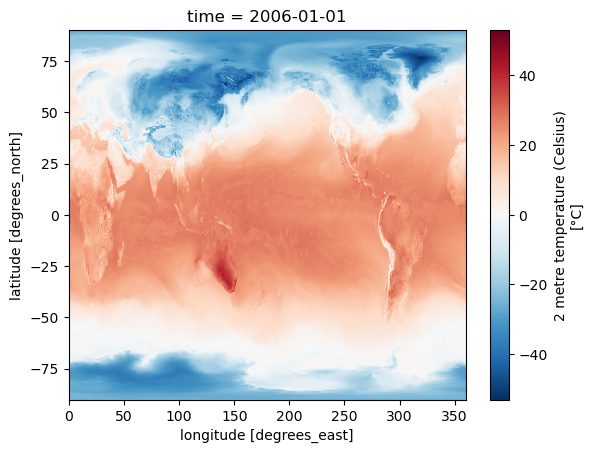

In [8]:
# Plot first time step in Celsius
ds['t2m_celsius'].isel(time=0).plot()

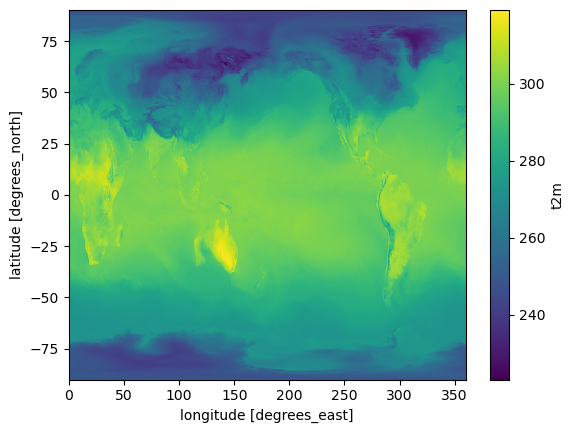

In [ ]:
# Plot the daily max values - note if the time dimension is not set, this will plot the last time step
daily_max.plot()

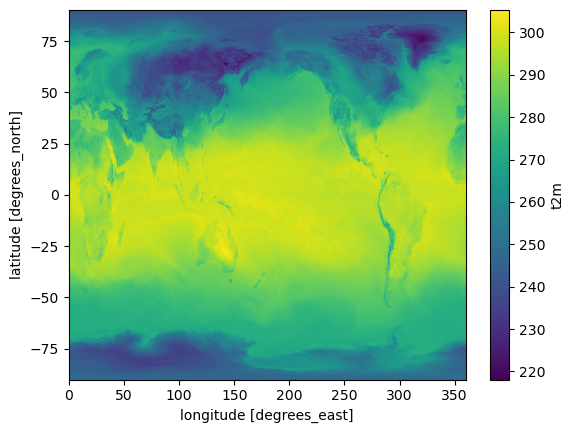

In [ ]:
# Plot the daily min values
daily_min.plot()

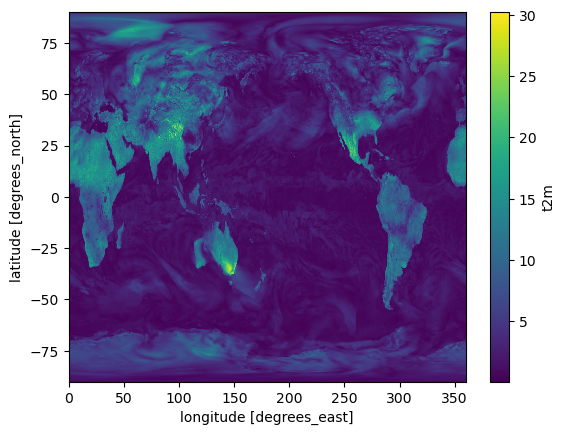

In [ ]:
# Plot the daily difference values - quite an interesting plot
diff = daily_max - daily_min
diff.plot()

## Challenge 4 — UK Regional Analysis

### Background
Focusing on specific geographical regions allows for more detailed analysis and is often more relevant for local applications. The UK provides an interesting case study with its maritime climate and varied topography.

### Your Task
Extract and analyse temperature data for the UK region, including:
- Correcting longitude coordinates from 0-360° to -180-180° range
- Selecting the UK bounding box (-10°W to 3°E, 49°N to 61°N)
- Creating time-series plots of UK-wide temperature averages
- Comparing different time steps across the day

**Success criteria:** accurate geographical selection, clear regional analysis, meaningful time-series visualisations.

In [12]:
# --- Fix longitude range: from 0–360 → -180–180
ds = ds.assign_coords(longitude=(((ds.longitude + 180) % 360) - 180))
ds = ds.sortby('longitude')   # ensures coordinates are ordered - this is needed

In [13]:
# --- Select UK bounding box (roughly -10°W to 3°E, 49–61°N)
uk = ds['t2m_celsius'].sel(
    longitude=slice(-10, 3),
    latitude=slice(61, 49)   # NOTE: latitude goes from N → S, so slice(61, 49)
)

In [ ]:
# Print the UK slice
print(uk)

<xarray.DataArray 't2m_celsius' (time: 24, latitude: 49, longitude: 53)> Size: 499kB
dask.array<getitem, shape=(24, 49, 53), dtype=float64, chunksize=(1, 49, 53), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 196B 61.0 60.75 60.5 60.25 ... 49.5 49.25 49.0
  * time       (time) datetime64[ns] 192B 2006-01-01 ... 2006-01-01T23:00:00
  * longitude  (longitude) float32 212B -10.0 -9.75 -9.5 -9.25 ... 2.5 2.75 3.0
Attributes:
    units:        °C
    long_name:    2 metre temperature (Celsius)
    description:  Converted from Kelvin to Celsius


In [ ]:
# Print the longitude range
print(ds.longitude.min().values, ds.longitude.max().values)

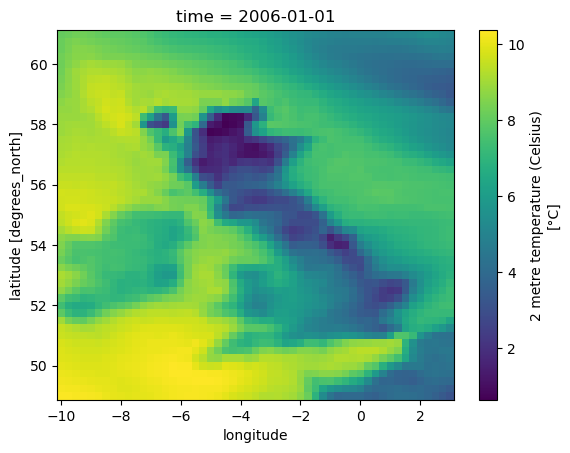

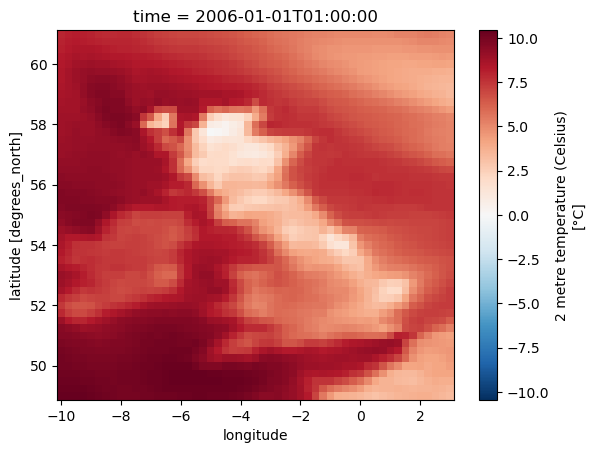

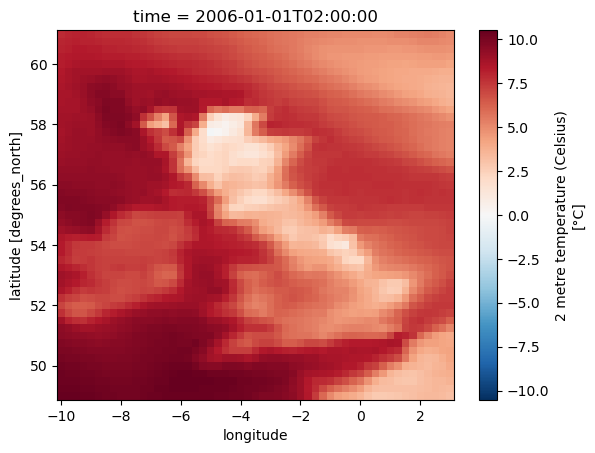

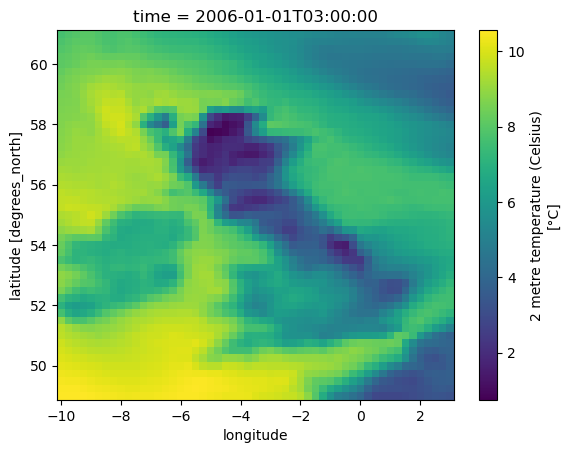

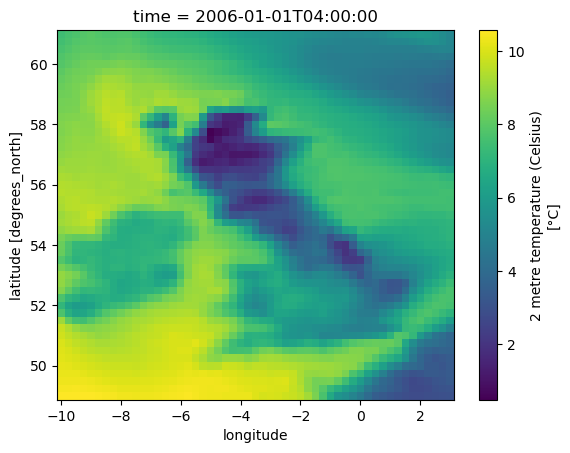

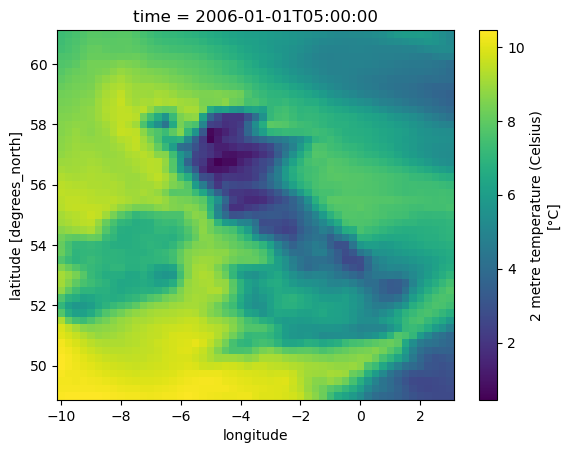

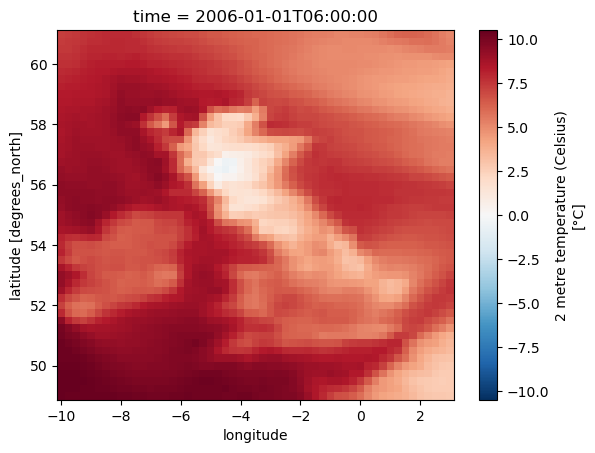

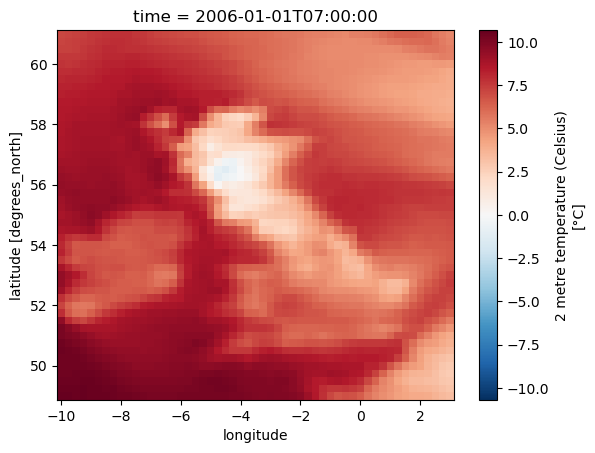

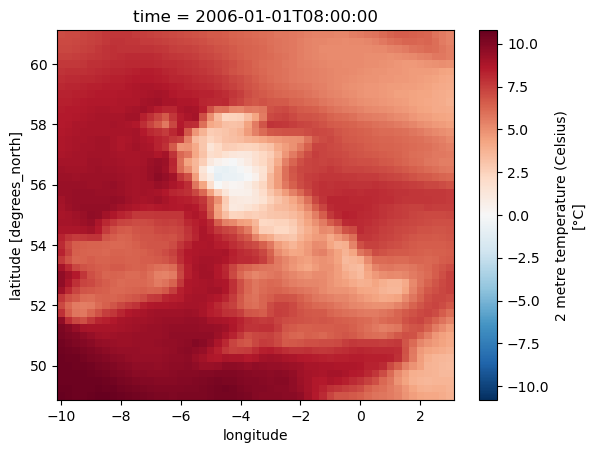

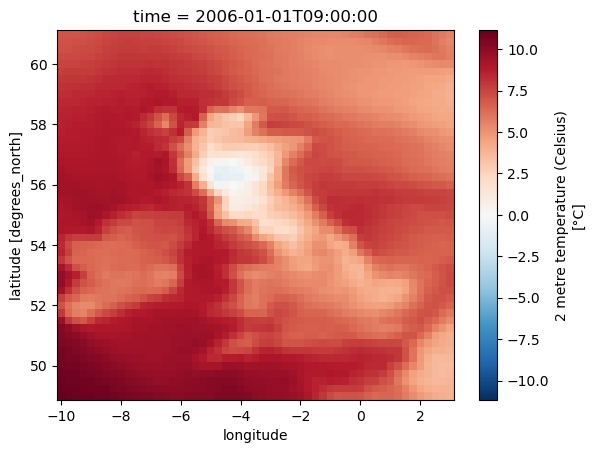

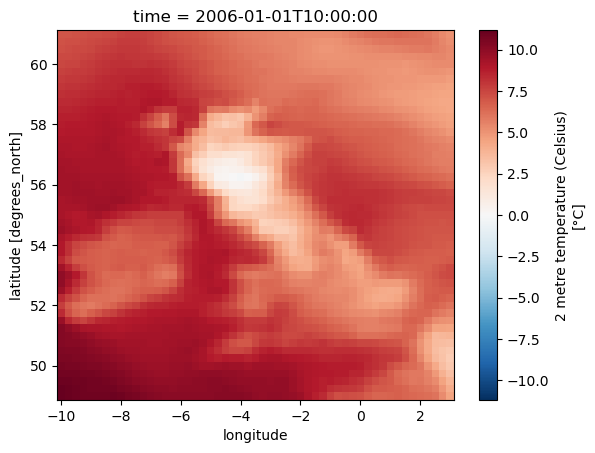

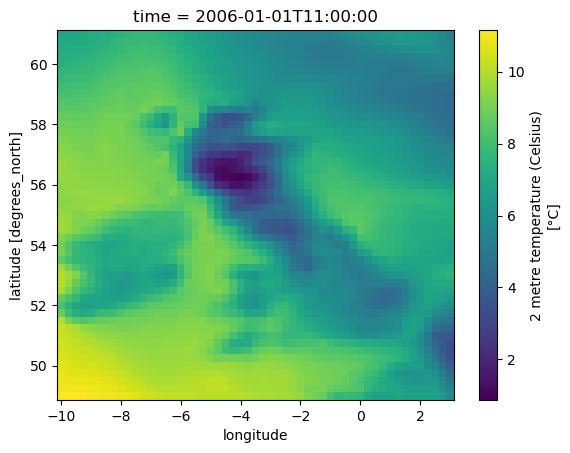

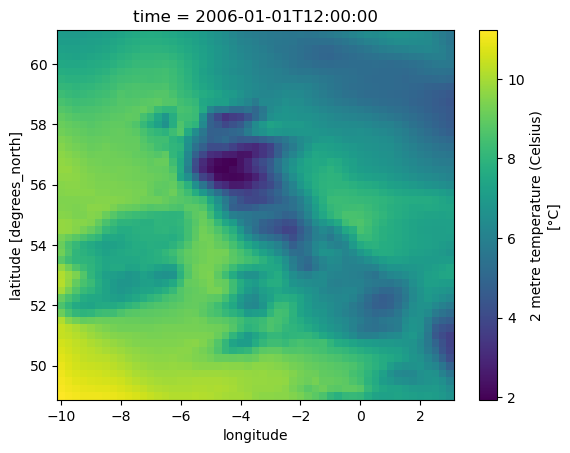

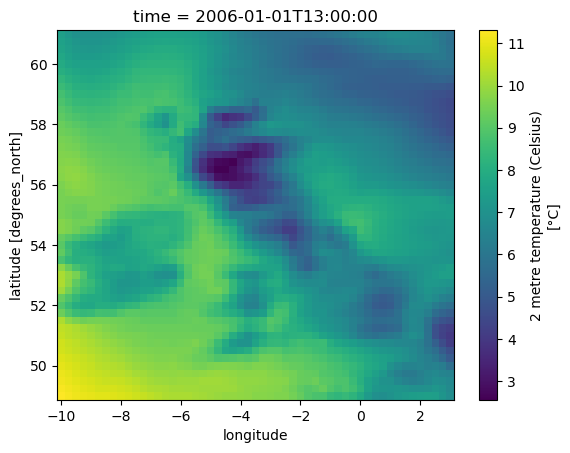

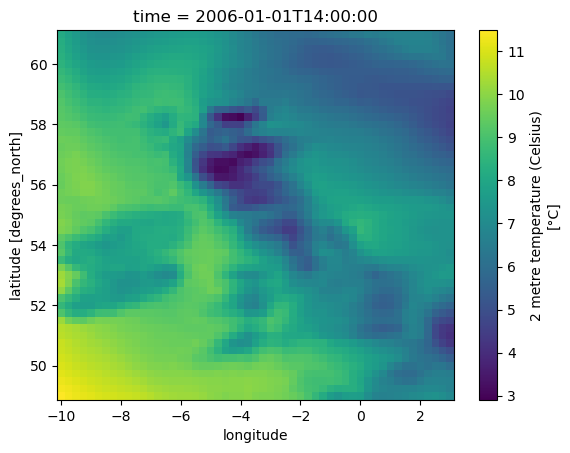

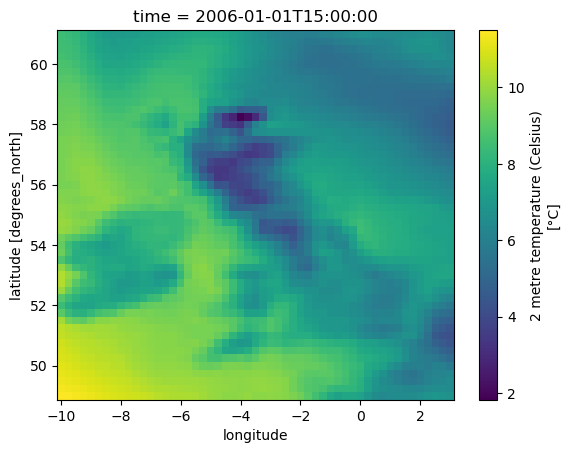

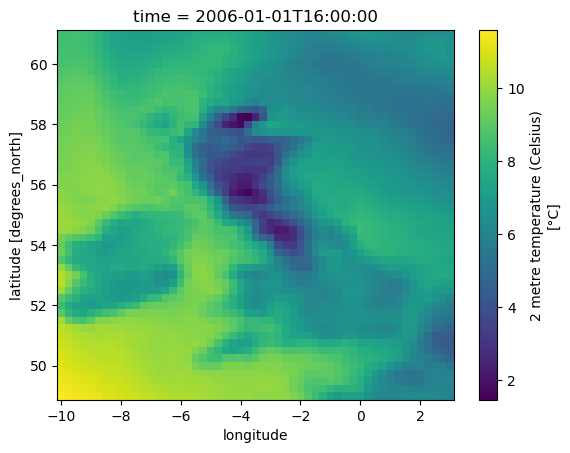

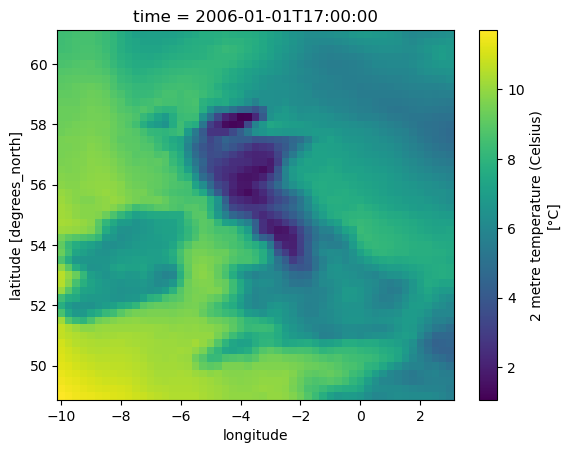

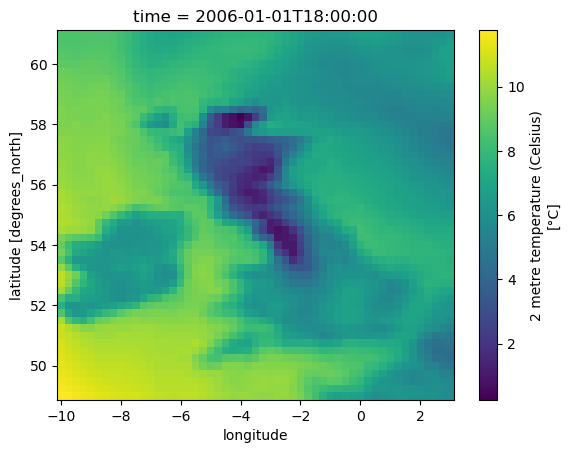

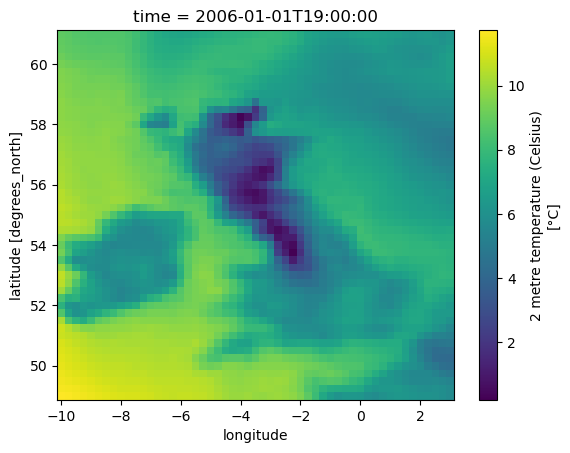

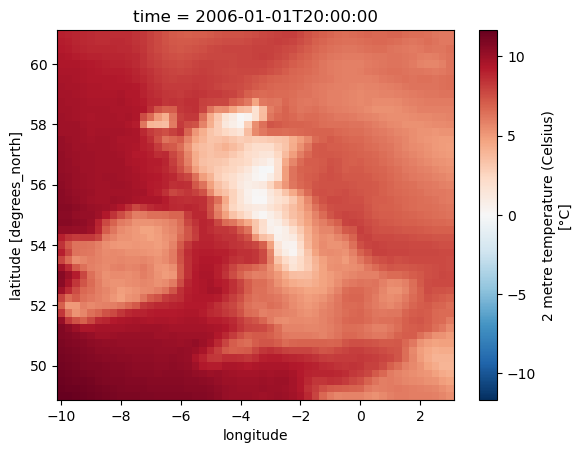

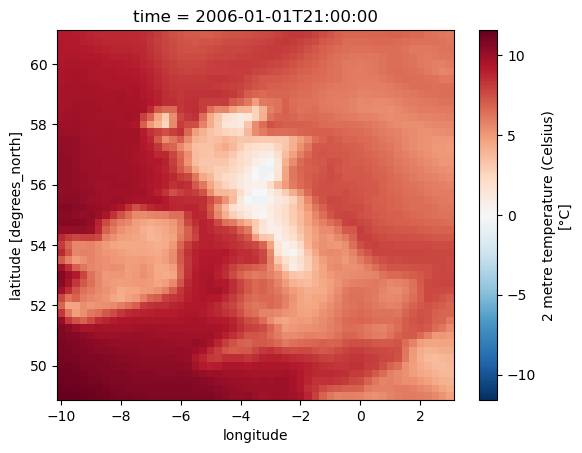

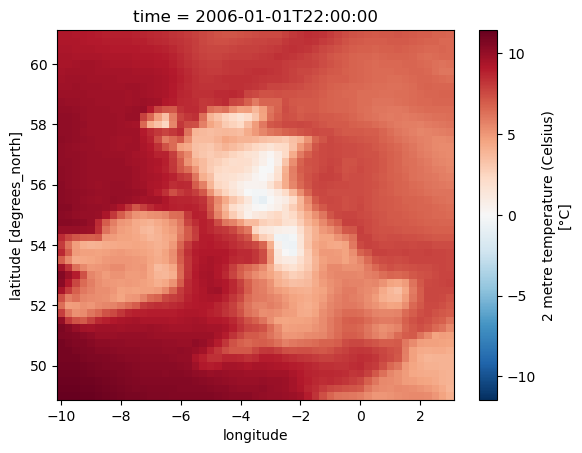

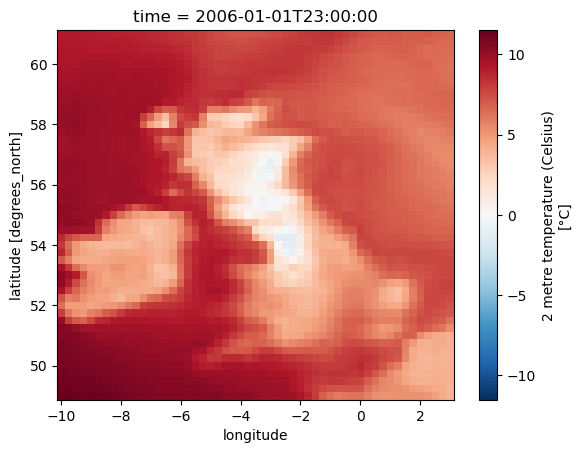

In [16]:
# --- Plot first timestep
import matplotlib.pyplot as plt
if uk.sizes['longitude'] > 0 and uk.sizes['latitude'] > 0:
    for t in range(len(uk.time)): # show across time range
        uk.isel(time=t).plot()
        plt.show()
    #uk.isel(time=0).plot()
else:
    print("⚠️ UK slice returned no data — check longitude/latitude ranges.")

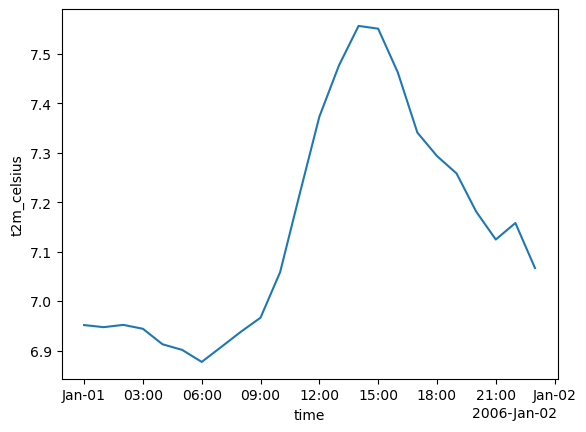

In [ ]:
# Calculate the mean temperature across the UK
uk_mean = uk.mean(dim=["longitude", "latitude"])
# Plot the mean temperature
uk_mean.plot()
# Add a title to the plot
plt.title('UK mean daily temperature (oC)')

## Challenge 5 — Bedfordshire Local Analysis

### Background
Bedfordshire provides a local focus for the hackathon, allowing participants to examine climate patterns at a more granular scale. This local analysis can reveal microclimatic variations and provide insights relevant to the region where the hackathon is taking place.

### Your Task
Conduct detailed analysis of temperature patterns in Bedfordshire, including:
- Selecting the Bedfordshire bounding box (-0.89°W to 0.23°E, 51.95°N to 52.49°N)
- Creating local temperature maps and time-series
- Comparing Bedfordshire patterns with UK-wide averages
- Analysing daily temperature variations

**Success criteria:** accurate local geographical selection, detailed local analysis, meaningful comparisons with broader patterns.

In [18]:
# --- Select Bedfordshire bounding box (roughly -10°W to 3°E, 49–61°N)
bedfordshire = ds['t2m_celsius'].sel(
    longitude=slice(-0.89, 0.23),
    latitude=slice(52.49, 51.95)   # NOTE: latitude goes from N → S, so slice(61, 49)
)

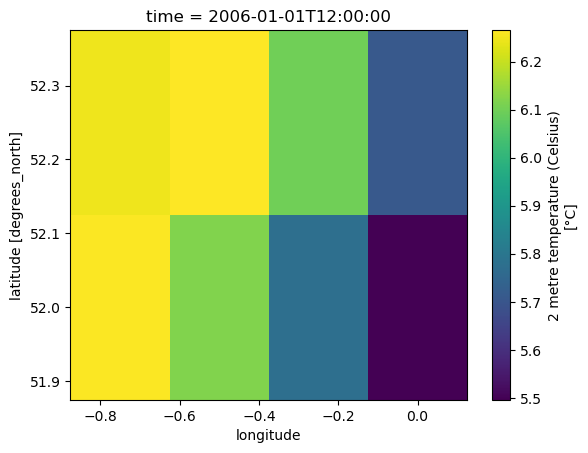

In [ ]:
# Plot the Bedfordshire slice
bedfordshire.isel(time=12).plot()

Text(0.5, 1.0, 'Bedfordshire mean daily temperature (oC)')

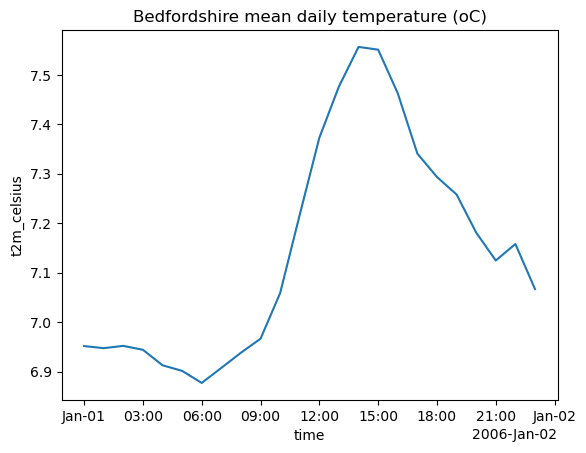

In [ ]:
# Calculate the mean temperature across the Bedfordshire region
bedfordshire_mean = uk.mean(dim=["longitude", "latitude"])
# Plot the mean temperature
bedfordshire_mean.plot()
# Add a title to the plot
plt.title('Bedfordshire mean daily temperature (oC)')

## Challenge 6 — Data Animation and Visualisation

### Background
Animated visualisations can make temporal data much more intuitive and engaging. They help reveal patterns that might not be obvious in static plots and can be particularly effective for communicating climate data to diverse audiences.

### Your Task
Create animated visualisations of the temperature data, including:
- Developing smooth animations for both UK and Bedfordshire regions
- Using consistent colour mapping across time steps
- Creating engaging titles and labels that update with time
- Optimising animation performance for smooth playback

**Success criteria:** smooth, engaging animations, consistent visualisation, clear temporal progression, good performance.

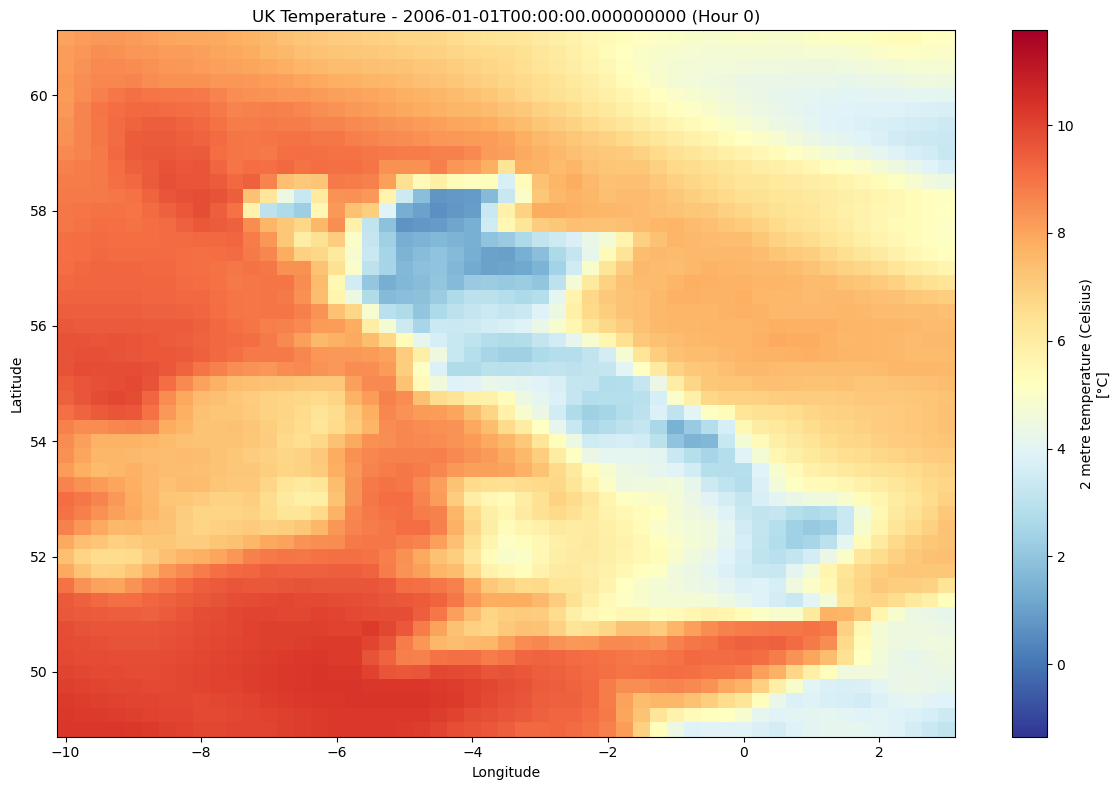

In [21]:
# Create animated UK plots using matplotlib animation
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import HTML

# Set up the figure for UK animation
fig_uk, ax_uk = plt.subplots(figsize=(12, 8))

# Get the data range for consistent colour mapping
vmin_uk = uk.min().values
vmax_uk = uk.max().values

# Initial plot
im_uk = uk.isel(time=0).plot(ax=ax_uk, vmin=vmin_uk, vmax=vmax_uk, 
                            cmap='RdYlBu_r', add_colorbar=True)
ax_uk.set_title('UK Temperature Animation - 1st January 2005')
ax_uk.set_xlabel('Longitude')
ax_uk.set_ylabel('Latitude')

def animate_uk(frame):
    """Animation function for UK temperature maps"""
    # Don't clear the axes - just update the data
    im_uk.set_array(uk.isel(time=frame).values.flatten())
    ax_uk.set_title(f'UK Temperature - {uk.time[frame].values} (Hour {frame})')
    # Keep the same axis limits and formatting

# Create animation
anim_uk = FuncAnimation(fig_uk, animate_uk, frames=len(uk.time), 
                       interval=500, repeat=True, blit=False)

plt.tight_layout()

# Display the animation properly in Jupyter
HTML(anim_uk.to_jshtml())


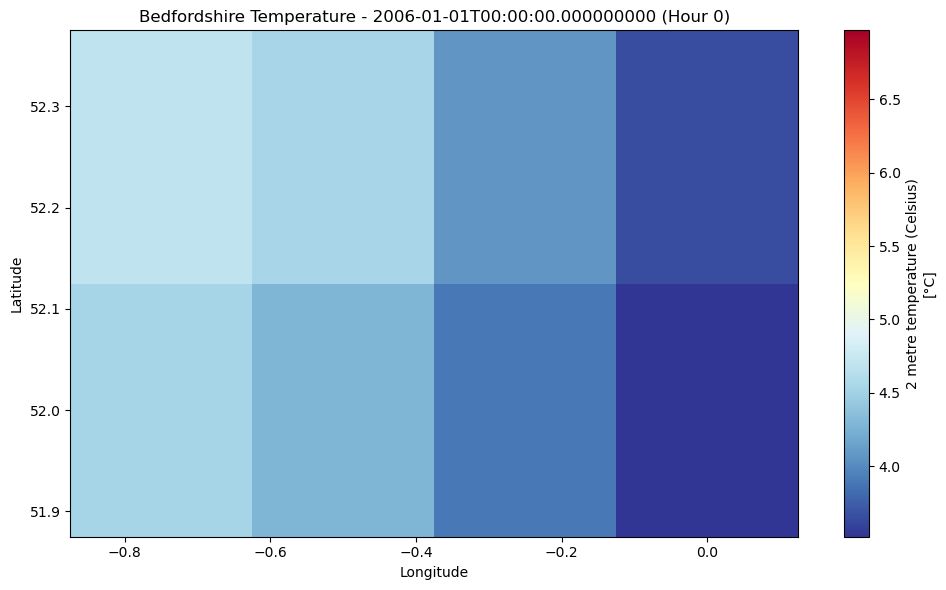

In [22]:
# Create animated Bedfordshire plot
fig_beds, ax_beds = plt.subplots(figsize=(10, 6))

# Get the data range for consistent colour mapping
vmin_beds = bedfordshire.min().values
vmax_beds = bedfordshire.max().values

# Initial plot
im_beds = bedfordshire.isel(time=0).plot(ax=ax_beds, vmin=vmin_beds, vmax=vmax_beds, 
                                        cmap='RdYlBu_r', add_colorbar=True)
ax_beds.set_title('Bedfordshire Temperature Animation - 1st January 2005')
ax_beds.set_xlabel('Longitude')
ax_beds.set_ylabel('Latitude')

def animate_beds(frame):
    """Animation function for Bedfordshire temperature maps"""
    # Update only the data instead of clearing the entire axes
    im_beds.set_array(bedfordshire.isel(time=frame).values.flatten())
    ax_beds.set_title(f'Bedfordshire Temperature - {bedfordshire.time[frame].values} (Hour {frame})')
    # Keep the same axis limits and formatting - no need to clear and redraw

# Create animation
anim_beds = FuncAnimation(fig_beds, animate_beds, frames=len(bedfordshire.time), 
                         interval=500, repeat=True, blit=False)

plt.tight_layout()

# Display the animation properly in Jupyter
HTML(anim_beds.to_jshtml())


## Epilogue
In this notebook, a range of data processing approaches and filtering strategies have been used to explore ECMWF data from 2006. A novel approach was used to animate the data to make it more presentable and engaging. Hopefully you will have tried to enhance and develop these ideas further. 

**Extension ideas:**
- Compare data from two separate years and animate the difference
- Explore other ECMWF variables like precipitation or wind speed
- Combine ECMWF data with other datasets for more comprehensive analysis
- Develop interactive dashboards using the processed data